# scikit-FIBERS: HLA Notebook (First FIBERS Paper Data)


***
## Imports:

In [1]:
import os
import pickle
import pandas as pd
from sklearn.metrics import classification_report
from src.skfibers.fibers import FIBERS

current_working_directory = os.getcwd()
print(current_working_directory)

#Local Run Parameters
local_save = False
folder_path = 'C:/Users/ryanu/Desktop/HLA_output_log_rank'
if not os.path.exists(folder_path):
        os.makedirs(folder_path)
if local_save:
    output_folder = 'local_output'
else:
    output_folder = folder_path

c:\Users\ryanu\OneDrive\Documents\GitHub\scikit-FIBERS


***
## Load and Prepare HLA Data

In [2]:
data_path = 'C:/Users/ryanu/Desktop/HLA/Imp1/Imp1.csv'
data_name = 'Imp1'
data = pd.read_csv(data_path,low_memory=False)

#Define key column names to be used in analysis
outcome_label = "graftyrs"
censor_label = "grf_fail"
amino_acids = ['A1', 'A10', 'A100', 'A101', 'A102', 'A103', 'A104', 'A105', 'A106', 'A107', 'A108', 'A109', 'A11', 'A110', 'A111', 'A112', 'A113', 'A114', 'A115', 'A116', 'A117', 'A118', 'A119', 'A12', 'A120', 'A121', 'A122', 'A123', 'A124', 'A125', 'A126', 'A127', 'A128', 'A129', 'A13', 'A130', 'A131', 'A132', 'A133', 'A134', 'A135', 'A136', 'A137', 'A138', 'A139', 'A14', 'A140', 'A141', 'A142', 'A143', 'A144', 'A145', 'A146', 'A147', 'A148', 'A149', 'A15', 'A150', 'A151', 'A152', 'A153', 'A154', 'A155', 'A156', 'A157', 'A158', 'A159', 'A16', 'A160', 'A161', 'A162', 'A163', 'A164', 'A165', 'A166', 'A167', 'A168', 'A169', 'A17', 'A170', 'A171', 'A172', 'A173', 'A174', 'A175', 'A176', 'A177', 'A178', 'A179', 'A18', 'A180', 'A181', 'A182', 'A183', 'A184', 'A185', 'A186', 'A187', 'A188', 'A189', 'A19', 'A190', 'A191', 'A192', 'A193', 'A194', 'A195', 'A196', 'A197', 'A198', 'A199', 'A2', 'A20', 'A21', 'A22', 'A23', 'A24', 'A25', 'A26', 'A27', 'A28', 'A29', 'A3', 'A30', 'A31', 'A32', 'A33', 'A34', 'A35', 'A36', 'A37', 'A38', 'A39', 'A4', 'A40', 'A41', 'A42', 'A43', 'A44', 'A45', 'A46', 'A47', 'A48', 'A49', 'A5', 'A50', 'A51', 'A52', 'A53', 'A54', 'A55', 'A56', 'A57', 'A58', 'A59', 'A6', 'A60', 'A61', 'A62', 'A63', 'A64', 'A65', 'A66', 'A67', 'A68', 'A69', 'A7', 'A70', 'A71', 'A72', 'A73', 'A74', 'A75', 'A76', 'A77', 'A78', 'A79', 'A8', 'A80', 'A81', 'A82', 'A83', 'A84', 'A85', 'A86', 'A87', 'A88', 'A89', 'A9', 'A90', 'A91', 'A92', 'A93', 'A94', 'A95', 'A96', 'A97', 'A98', 'A99', 'B1', 'B10', 'B100', 'B101', 'B102', 'B103', 'B104', 'B105', 'B106', 'B107', 'B108', 'B109', 'B11', 'B110', 'B111', 'B112', 'B113', 'B114', 'B115', 'B116', 'B117', 'B118', 'B119', 'B12', 'B120', 'B121', 'B122', 'B123', 'B124', 'B125', 'B126', 'B127', 'B128', 'B129', 'B13', 'B130', 'B131', 'B132', 'B133', 'B134', 'B135', 'B136', 'B137', 'B138', 'B139', 'B14', 'B140', 'B141', 'B142', 'B143', 'B144', 'B145', 'B146', 'B147', 'B148', 'B149', 'B15', 'B150', 'B151', 'B152', 'B153', 'B154', 'B155', 'B156', 'B157', 'B158', 'B159', 'B16', 'B160', 'B161', 'B162', 'B163', 'B164', 'B165', 'B166', 'B167', 'B168', 'B169', 'B17', 'B170', 'B171', 'B172', 'B173', 'B174', 'B175', 'B176', 'B177', 'B178', 'B179', 'B18', 'B180', 'B181', 'B182', 'B183', 'B184', 'B185', 'B186', 'B187', 'B188', 'B189', 'B19', 'B190', 'B191', 'B192', 'B193', 'B194', 'B2', 'B20', 'B21', 'B22', 'B23', 'B24', 'B25', 'B26', 'B27', 'B28', 'B29', 'B3', 'B30', 'B31', 'B32', 'B33', 'B34', 'B35', 'B36', 'B37', 'B38', 'B39', 'B4', 'B40', 'B41', 'B42', 'B43', 'B44', 'B45', 'B46', 'B47', 'B48', 'B49', 'B5', 'B50', 'B51', 'B52', 'B53', 'B54', 'B55', 'B56', 'B57', 'B58', 'B59', 'B6', 'B60', 'B61', 'B62', 'B63', 'B64', 'B65', 'B66', 'B67', 'B68', 'B69', 'B7', 'B70', 'B71', 'B72', 'B73', 'B74', 'B75', 'B76', 'B77', 'B78', 'B79', 'B8', 'B80', 'B81', 'B82', 'B83', 'B84', 'B85', 'B86', 'B87', 'B88', 'B89', 'B9', 'B90', 'B91', 'B92', 'B93', 'B94', 'B95', 'B96', 'B97', 'B98', 'B99', 'C1', 'C10', 'C100', 'C101', 'C102', 'C103', 'C104', 'C105', 'C106', 'C107', 'C108', 'C109', 'C11', 'C110', 'C111', 'C112', 'C113', 'C114', 'C115', 'C116', 'C117', 'C118', 'C119', 'C12', 'C120', 'C121', 'C122', 'C123', 'C124', 'C125', 'C126', 'C127', 'C128', 'C129', 'C13', 'C130', 'C131', 'C132', 'C133', 'C134', 'C135', 'C136', 'C137', 'C138', 'C139', 'C14', 'C140', 'C141', 'C142', 'C143', 'C144', 'C145', 'C146', 'C147', 'C148', 'C149', 'C15', 'C150', 'C151', 'C152', 'C153', 'C154', 'C155', 'C156', 'C157', 'C158', 'C159', 'C16', 'C160', 'C161', 'C162', 'C163', 'C164', 'C165', 'C166', 'C167', 'C168', 'C169', 'C17', 'C170', 'C171', 'C172', 'C173', 'C174', 'C175', 'C176', 'C177', 'C178', 'C179', 'C18', 'C180', 'C181', 'C182', 'C183', 'C184', 'C185', 'C186', 'C187', 'C188', 'C189', 'C19', 'C190', 'C191', 'C192', 'C193', 'C194', 'C195', 'C196', 'C197', 'C198', 'C199', 'C2', 'C20', 'C200', 'C201', 'C202', 'C203', 'C204', 'C205', 'C21', 'C22', 'C23', 'C24', 'C25', 'C26', 'C27', 'C28', 'C29', 'C3', 'C30', 'C31', 'C32', 'C33', 'C34', 'C35', 'C36', 'C37', 'C38', 'C39', 'C4', 'C40', 'C41', 'C42', 'C43', 'C44', 'C45', 'C46', 'C47', 'C48', 'C49', 'C5', 'C50', 'C51', 'C52', 'C53', 'C54', 'C55', 'C56', 'C57', 'C58', 'C59', 'C6', 'C60', 'C61', 'C62', 'C63', 'C64', 'C65', 'C66', 'C67', 'C68', 'C69', 'C7', 'C70', 'C71', 'C72', 'C73', 'C74', 'C75', 'C76', 'C77', 'C78', 'C79', 'C8', 'C80', 'C81', 'C82', 'C83', 'C84', 'C85', 'C86', 'C87', 'C88', 'C89', 'C9', 'C90', 'C91', 'C92', 'C93', 'C94', 'C95', 'C96', 'C97', 'C98', 'C99', 'DQB11', 'DQB110', 'DQB111', 'DQB112', 'DQB113', 'DQB114', 'DQB115', 'DQB116', 'DQB117', 'DQB118', 'DQB119', 'DQB12', 'DQB120', 'DQB121', 'DQB122', 'DQB123', 'DQB124', 'DQB125', 'DQB126', 'DQB127', 'DQB128', 'DQB129', 'DQB13', 'DQB130', 'DQB131', 'DQB132', 'DQB133', 'DQB134', 'DQB135', 'DQB136', 'DQB137', 'DQB138', 'DQB139', 'DQB14', 'DQB140', 'DQB141', 'DQB142', 'DQB143', 'DQB144', 'DQB145', 'DQB146', 'DQB147', 'DQB148', 'DQB149', 'DQB15', 'DQB150', 'DQB151', 'DQB152', 'DQB153', 'DQB154', 'DQB155', 'DQB156', 'DQB157', 'DQB158', 'DQB159', 'DQB16', 'DQB160', 'DQB161', 'DQB162', 'DQB163', 'DQB164', 'DQB165', 'DQB166', 'DQB167', 'DQB168', 'DQB169', 'DQB17', 'DQB170', 'DQB171', 'DQB172', 'DQB173', 'DQB174', 'DQB175', 'DQB176', 'DQB177', 'DQB178', 'DQB179', 'DQB18', 'DQB180', 'DQB181', 'DQB182', 'DQB183', 'DQB184', 'DQB185', 'DQB186', 'DQB187', 'DQB188', 'DQB189', 'DQB19', 'DQB190', 'DQB191', 'DQB192', 'DQB193', 'DQB194', 'DRB11', 'DRB110', 'DRB111', 'DRB112', 'DRB113', 'DRB114', 'DRB115', 'DRB116', 'DRB117', 'DRB118', 'DRB119', 'DRB12', 'DRB120', 'DRB121', 'DRB122', 'DRB123', 'DRB124', 'DRB125', 'DRB126', 'DRB127', 'DRB128', 'DRB129', 'DRB13', 'DRB130', 'DRB131', 'DRB132', 'DRB133', 'DRB134', 'DRB135', 'DRB136', 'DRB137', 'DRB138', 'DRB139', 'DRB14', 'DRB140', 'DRB141', 'DRB142', 'DRB143', 'DRB144', 'DRB145', 'DRB146', 'DRB147', 'DRB148', 'DRB149', 'DRB15', 'DRB150', 'DRB151', 'DRB152', 'DRB153', 'DRB154', 'DRB155', 'DRB156', 'DRB157', 'DRB158', 'DRB159', 'DRB16', 'DRB160', 'DRB161', 'DRB162', 'DRB163', 'DRB164', 'DRB165', 'DRB166', 'DRB167', 'DRB168', 'DRB169', 'DRB17', 'DRB170', 'DRB171', 'DRB172', 'DRB173', 'DRB174', 'DRB175', 'DRB176', 'DRB177', 'DRB178', 'DRB179', 'DRB18', 'DRB180', 'DRB181', 'DRB182', 'DRB183', 'DRB184', 'DRB185', 'DRB186', 'DRB187', 'DRB188', 'DRB189', 'DRB19', 'DRB190', 'DRB191', 'DRB192', 'DRB193', 'DRB194']
covariates = ['shared', 'DCD', 'DON_AGE', 'donage_slope_ge18', 'dcadcodanox', 'dcadcodcva', 'dcadcodcnst', 'dcadcodoth', 'don_cmv_negative', 
              'don_htn_0c', 'ln_don_wgt_kg_0c', 'ln_don_wgt_kg_0c_s55', 'don_ecd', 'age_ecd', 'yearslice', 'REC_AGE_AT_TX', 
              'rec_age_spline_35', 'rec_age_spline_50', 'rec_age_spline_65', 'diab_noted', 'age_diab', 'dm_can_age_spline_50', 
              'can_dgn_htn_ndm', 'can_dgn_pk_ndm', 'can_dgn_gd_ndm', 'rec_prev_ki_tx', 'rec_prev_ki_tx_dm', 'rbmi_0c', 'rbmi_miss', 
              'rbmi_gt_20', 'rbmi_DM', 'rbmi_gt_20_DM', 'ln_c_hd_m', 'ln_c_hd_0c', 'ln_c_hd_m_ptx', 'PKPRA_MS', 'PKPRA_1080', 
              'PKPRA_GE80', 'hispanic', 'CAN_RACE_BLACK', 'CAN_RACE_asian', 'CAN_RACE_WHITE', 'mm0', 'mmDR0', 'mmDR1', 'mmA0', 'mmA1', 
              'mmB0', 'mmB1', 'mmC0', 'mmC1', 'mmDQ0', 'mmDQ1']

print("Shape of Raw DataFrame:", data.shape)
missing_sum = data.isna().sum().sum()
print("Sum of raw data missing values:", missing_sum)

features = amino_acids + covariates + [outcome_label] + [censor_label]
print(str(len(features))+ " Total Columns")
print(str(len(amino_acids))+" AAs")
print(str(len(covariates))+ " Covariates")

data = data[features]
print("Shape of New DataFrame:", data.shape)
missing_sum = data.isna().sum().sum()
print("Sum of data missing values:", missing_sum)

data.head(3)
#Debugging
# Create a new DataFrame with 100 random rows
#data = data.sample(n=1000)

Shape of Raw DataFrame: (166574, 865)
Sum of raw data missing values: 268236
841 Total Columns
786 AAs
53 Covariates
Shape of New DataFrame: (166574, 841)
Sum of data missing values: 0


,A1,A10,A100,A101,A102,A103,A104,A105,A106,A107,...,mmA0,mmA1,mmB0,mmB1,mmC0,mmC1,mmDQ0,mmDQ1,graftyrs,grf_fail
0,0,0,0,0,0,0,0,0,0,0,...,0,1,0,1,0,1,0,1,3.233490,1
1,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,1,0,0,0,16.003176,0
2,0,0,0,0,1,0,0,1,0,0,...,0,0,0,0,0,0,1,0,17.002519,0


In [3]:
#Covariate examination
column_types_count = data.dtypes.value_counts()
print(column_types_count)
object_columns = data.columns[data.dtypes == 'object']
print(object_columns)
num_categories = data['REC_AGE_AT_TX'].unique()
print(num_categories)
data['REC_AGE_AT_TX']

int64      832
float64      8
object       1
Name: count, dtype: int64
Index(['REC_AGE_AT_TX'], dtype='object')
['35-49' '50-64' '65+' '18-34']


0         35-49
1         35-49
2         35-49
3         50-64
4           65+
          ...  
166569    50-64
166570    50-64
166571    35-49
166572      65+
166573    50-64
Name: REC_AGE_AT_TX, Length: 166574, dtype: object

In [4]:
#Process covariates as needed
cat_columns = data.select_dtypes(['object']).columns
data[cat_columns] = data[cat_columns].apply(lambda x: pd.factorize(x)[0])   #IMPORTANT - this encoding is temporary to replicate paper analysis.  This must be fixed so that age ranges are ordinally encoded.
num_categories = data['REC_AGE_AT_TX'].unique()
print(num_categories)
data['REC_AGE_AT_TX']

[0 1 2 3]


0         0
1         0
2         0
3         1
4         2
         ..
166569    1
166570    1
166571    0
166572    2
166573    1
Name: REC_AGE_AT_TX, Length: 166574, dtype: int64

In [5]:
filter_all_rare = True
rare_freq = 0.01
if filter_all_rare:
    #Filter out rare AAs (<1%)
    # Calculate the percentage of occurrences greater than 0 for each column
    percentages = data.loc[:,amino_acids].apply(lambda x: (x > 0).mean())
    print(percentages)
    columns_to_remove = percentages[percentages < rare_freq].index.tolist()
    data = data.drop(columns=columns_to_remove)
    data.shape
else:
    #Filter out invariant AAs
    # Calculate the percentage of occurrences greater than 0 for each column
    percentages = data.loc[:,amino_acids].apply(lambda x: (x > 0).mean())
    print(percentages)
    columns_to_remove = percentages[percentages == 0.0].index.tolist()
    data = data.drop(columns=columns_to_remove)
    data.shape

A1        0.000270
A10       0.000000
A100      0.000000
A101      0.000000
A102      0.005247
            ...   
DRB190    0.000018
DRB191    0.000018
DRB192    0.000036
DRB193    0.000036
DRB194    0.000042
Length: 786, dtype: float64


***
## Run FIBERS (Training)

In [6]:
#Load Manual Bin Population to Partially initialize Bin Population
pop_path = 'C:/Users/ryanu/Desktop/HLA/Imp1/HLA_Paper_Pop_Init.csv'
pop = pd.read_csv(pop_path,low_memory=False)

In [7]:

fibers = FIBERS(outcome_label="graftyrs", outcome_type="survival", iterations=50, pop_size=50, tournament_prop=0.2, crossover_prob=0.5, min_mutation_prob=0.1, max_mutation_prob=0.5, merge_prob=0.1, 
                new_gen=0.5, elitism=0.1, diversity_pressure=5, min_bin_size=1, max_bin_size=None, max_bin_init_size=10, fitness_metric="log_rank", log_rank_weighting=None, censor_label="grf_fail", 
                group_strata_min=0.2, penalty=0.5, group_thresh=None, min_thresh=0, max_thresh=5, int_thresh=True, thresh_evolve_prob=0.5, manual_bin_init=pop, covariates=covariates, pop_clean = 'group_strata',report=[0,10,20,30,40,50,60,70,80,90], 
                random_seed=42,verbose=False)

fibers = fibers.fit(data)


Dropped 0 invariant feature columns.
                                         feature_list  group_threshold  \
0               [A17, DQB155, DQB174, DRB112, DRB114]                0   
1       [B30, DQB155, DQB175, DRB112, DRB114, DRB126]                0   
2   [DRB111, DRB114, DRB116, DRB126, DRB128, DRB13...                0   
3    [DQB177, DQB184, DRB111, DRB126, DRB137, DRB160]                0   
4    [DQB153, DQB189, DRB111, DRB126, DRB137, DRB177]                0   
5            [DQB130, DQB155, DQB189, DRB113, DRB126]                0   
6                    [DQB155, DQB174, DRB111, DRB126]                0   
7                    [DQB130, DQB155, DRB113, DRB126]                0   
8                    [DQB130, DQB155, DRB113, DRB126]                0   
9   [A158, A186, B147, DQB137, DQB174, DQB185, DQB...                0   
10   [DQB130, DQB155, DRB110, DRB113, DRB132, DRB173]                0   
11                           [DQB155, DRB113, DRB126]                0   
1

 20%|██        | 10/50 [00:51<03:24,  5.12s/it]

ITERATION: 10
                                         feature_list  group_threshold  \
0   [A67, B66, DQB155, DQB174, DRB112, DRB114, DRB...                0   
1   [A17, A67, B65, B66, DQB155, DQB174, DQB184, D...                1   
2            [DQB130, DQB155, DQB189, DRB113, DRB126]                0   
3   [A73, B143, DQB137, DQB174, DQB185, DQB190, DR...                0   
4   [A158, A186, B147, DQB137, DQB174, DQB185, DQB...                0   
5   [B177, DQB155, DQB174, DRB112, DRB116, DRB137,...                1   
6   [A12, B65, C193, DQB155, DQB174, DQB184, DRB11...                1   
7   [A73, DQB130, DQB156, DQB174, DQB189, DRB113, ...                1   
8   [B143, B147, DQB137, DQB174, DQB185, DRB114, D...                0   
9               [A67, DQB130, DRB113, DRB116, DRB126]                0   
10  [B65, C193, DQB155, DQB174, DQB184, DQB189, DR...                1   
11  [A193, B66, DQB155, DQB174, DRB113, DRB114, DR...                2   
12           [DQB174, DR

 40%|████      | 20/50 [01:42<02:32,  5.07s/it]

ITERATION: 20
                                         feature_list  group_threshold  \
0   [B147, DQB155, DQB174, DRB112, DRB114, DRB116,...                0   
1   [A150, DQB147, DQB155, DQB174, DRB112, DRB114,...                0   
2   [A150, B65, DQB155, DQB174, DRB112, DRB114, DR...                0   
3   [B65, DQB155, DQB174, DRB112, DRB114, DRB132, ...                0   
4      [B147, DQB155, DQB174, DRB112, DRB126, DRB178]                0   
5   [A73, B147, DQB147, DQB155, DQB174, DRB112, DR...                0   
6   [B147, DQB147, DQB155, DQB174, DQB185, DRB112,...                0   
7   [B147, DQB138, DQB155, DQB174, DQB185, DRB112,...                0   
8   [B147, DQB155, DQB174, DQB185, DRB112, DRB114,...                0   
9   [B147, DQB147, DQB155, DRB112, DRB114, DRB116,...                0   
10  [A109, A150, A56, DQB155, DQB174, DQB185, DRB1...                1   
11  [A158, A67, B147, DQB147, DQB155, DQB174, DRB1...                1   
12  [A73, DQB137, DQB155

 60%|██████    | 30/50 [02:33<01:42,  5.12s/it]

ITERATION: 30
                                         feature_list  group_threshold  \
0   [B147, DQB155, DQB174, DRB112, DRB114, DRB116,...                0   
1   [B65, DQB155, DQB174, DRB112, DRB114, DRB132, ...                0   
2   [A73, DQB137, DQB155, DQB174, DQB185, DRB112, ...                0   
3   [B147, B94, DQB155, DQB174, DRB112, DRB114, DR...                0   
4   [A67, B147, DQB147, DQB174, DRB112, DRB116, DR...                0   
5            [DQB174, DRB112, DRB114, DRB132, DRB178]                0   
6   [A167, A43, B147, B171, DQB155, DQB174, DRB113...                1   
7      [C114, DQB155, DQB174, DRB112, DRB114, DRB178]                0   
8            [DQB174, DRB112, DRB132, DRB140, DRB178]                0   
9   [B147, B94, DQB147, DQB155, DQB174, DRB114, DR...                0   
10  [A150, B147, B94, DQB147, DQB155, DQB174, DRB1...                1   
11  [A109, B65, DQB155, DQB174, DRB112, DRB114, DR...                1   
12  [B147, B65, B99, DQB

 80%|████████  | 40/50 [03:24<00:50,  5.09s/it]

ITERATION: 40
                                         feature_list  group_threshold  \
0   [B147, DQB155, DQB174, DRB112, DRB114, DRB116,...                0   
1   [A73, DQB155, DQB174, DRB112, DRB114, DRB116, ...                0   
2   [A67, B66, DQB147, DQB155, DQB174, DRB112, DRB...                0   
3   [B147, DQB155, DQB174, DRB112, DRB114, DRB116,...                0   
4   [DQB155, DQB174, DQB189, DRB112, DRB116, DRB12...                0   
5   [DQB155, DQB174, DRB112, DRB114, DRB125, DRB13...                0   
6   [DQB155, DQB174, DRB112, DRB114, DRB116, DRB13...                0   
7   [B147, DQB155, DRB112, DRB114, DRB116, DRB132,...                0   
8   [DQB155, DQB174, DQB185, DQB187, DRB112, DRB11...                0   
9   [DQB155, DQB174, DQB175, DRB112, DRB114, DRB11...                1   
10  [B147, B180, DQB155, DQB174, DQB185, DRB112, D...                1   
11  [C91, DQB114, DQB155, DRB112, DRB114, DRB116, ...                0   
12  [A73, DQB155, DRB112

100%|██████████| 50/50 [04:26<00:00,  5.34s/it]

ITERATION: 50
                                         feature_list  group_threshold  \
0   [B147, DQB155, DQB174, DRB112, DRB114, DRB116,...                0   
1   [B147, C170, DQB155, DQB175, DRB112, DRB114, D...                0   
2   [A73, B147, DQB155, DQB174, DQB189, DRB112, DR...                0   
3   [C193, DQB128, DQB155, DQB175, DRB112, DRB116,...                0   
4   [B66, C147, DQB155, DQB174, DRB112, DRB114, DR...                1   
5   [A114, A90, B147, B62, DQB155, DQB174, DQB175,...                2   
6     [DQB155, DQB174, DQB19, DRB112, DRB116, DRB132]                0   
7   [A73, DQB130, DQB174, DQB189, DRB112, DRB114, ...                1   
8   [A158, A161, DQB147, DQB155, DQB174, DRB114, D...                0   
9   [A114, A144, B62, DQB155, DQB170, DQB174, DRB1...                1   
10  [A114, A90, B147, DQB155, DQB174, DRB114, DRB1...                1   
11  [A67, A90, B147, DQB147, DQB174, DRB112, DRB11...                0   
12  [A12, DQB155, DQB156

### Report Run Time

In [8]:
# Report run time
print(fibers.elapsed_time)

298.1392982006073


***
## Top (or Target) Bin Examination
### Specify Bin to Examine

In [9]:
bin_index = 0 # lowest index is the bin with the highest fitness (only reports the bin ranked at the top, despite possible fitness ties for top)

### Get Bin Details

In [10]:
fibers.get_bin_report(bin_index)

,0
Features in Bin:,"[B147, DQB155, DQB174, DRB112, DRB114, DRB116,..."
Threshold:,0
Fitness,1.0
Pre-Fitness:,488.288538
Log-Rank Score:,488.288538
Log-Rank p-value:,0.0
Bin Size:,8
Group Ratio:,0.246569
Count At/Below Threshold:,41072
Count Above Threshold:,125502


### Plot: Kaplan Meier Survival Curves For Each Group Defined by the Target Bin

Dropped 0 invariant feature columns.


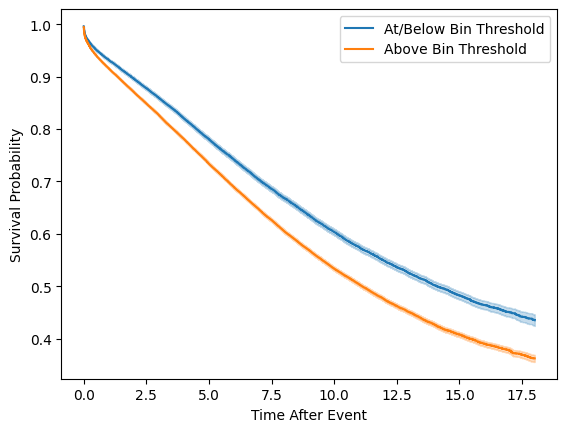

In [11]:
fibers.get_kaplan_meir(data,bin_index,save=True,output_folder=output_folder,data_name=data_name)

### Evaluate Target Bin Using Cox Proportional Hazard Model (adjusting for covariates)

In [12]:
summary = fibers.get_cox_prop_hazard(data, bin_index)
bin_hr = summary['exp(coef)'].iloc[0]
bin_low_CI = summary['exp(coef) lower 95%'].iloc[0]
bin_upper_CI = summary['exp(coef) upper 95%'].iloc[0]
bin_p_val = summary['p'].iloc[0]
print("Bin HR: "+str(bin_hr)+" ("+str(bin_low_CI)+"-"+str(bin_upper_CI)+")")
print("Bin HR p-value: "+str(bin_p_val))
summary.to_csv(output_folder+'/'+'Cox_PH_'+str(bin_index)+'_'+data_name+'.csv', index=False)
summary

Dropped 0 invariant feature columns.
Bin HR: 1.1244635447863756 (1.09569850375514-1.1539837457294781)
Bin HR p-value: 7.16800780347106e-19


,coef,exp(coef),se(coef),coef lower 95%,coef upper 95%,exp(coef) lower 95%,exp(coef) upper 95%,cmp to,z,p,-log2(p)
covariate,,,,,,,,,,,
Bin_0,0.117306,1.124464,0.013222,0.091392,0.143220,1.095699,1.153984,0.0,8.872254,7.168008e-19,60.275062
shared,0.111934,1.118439,0.010199,0.091944,0.131924,1.096303,1.141021,0.0,10.974794,5.052092e-28,90.677106
DCD,0.077802,1.080908,0.014360,0.049657,0.105946,1.050911,1.111762,0.0,5.418030,6.025941e-08,23.984238
DON_AGE,-0.010641,0.989416,0.004817,-0.020081,-0.001200,0.980119,0.998801,0.0,-2.209045,2.717151e-02,5.201761
donage_slope_ge18,0.020301,1.020508,0.004955,0.010589,0.030013,1.010645,1.030468,0.0,4.096830,4.188463e-05,14.543220
dcadcodanox,0.043733,1.044703,0.012457,0.019317,0.068148,1.019505,1.070524,0.0,3.510598,4.470999e-04,11.127115
dcadcodcva,0.068262,1.070646,0.010874,0.046950,0.089574,1.048069,1.093709,0.0,6.277651,3.437274e-10,31.438016
dcadcodcnst,-0.000665,0.999335,0.051353,-0.101315,0.099984,0.903649,1.105153,0.0,-0.012955,9.896637e-01,0.014990
dcadcodoth,0.059613,1.061426,0.027605,0.005509,0.113717,1.005524,1.120436,0.0,2.159528,3.080924e-02,5.020493


### Check and View Any Top Bin Ties

In [13]:
fibers.report_ties()

Only one top performing bin found


***
## Bin Population Examination
### Plot: Basic Bin Population Heatmap

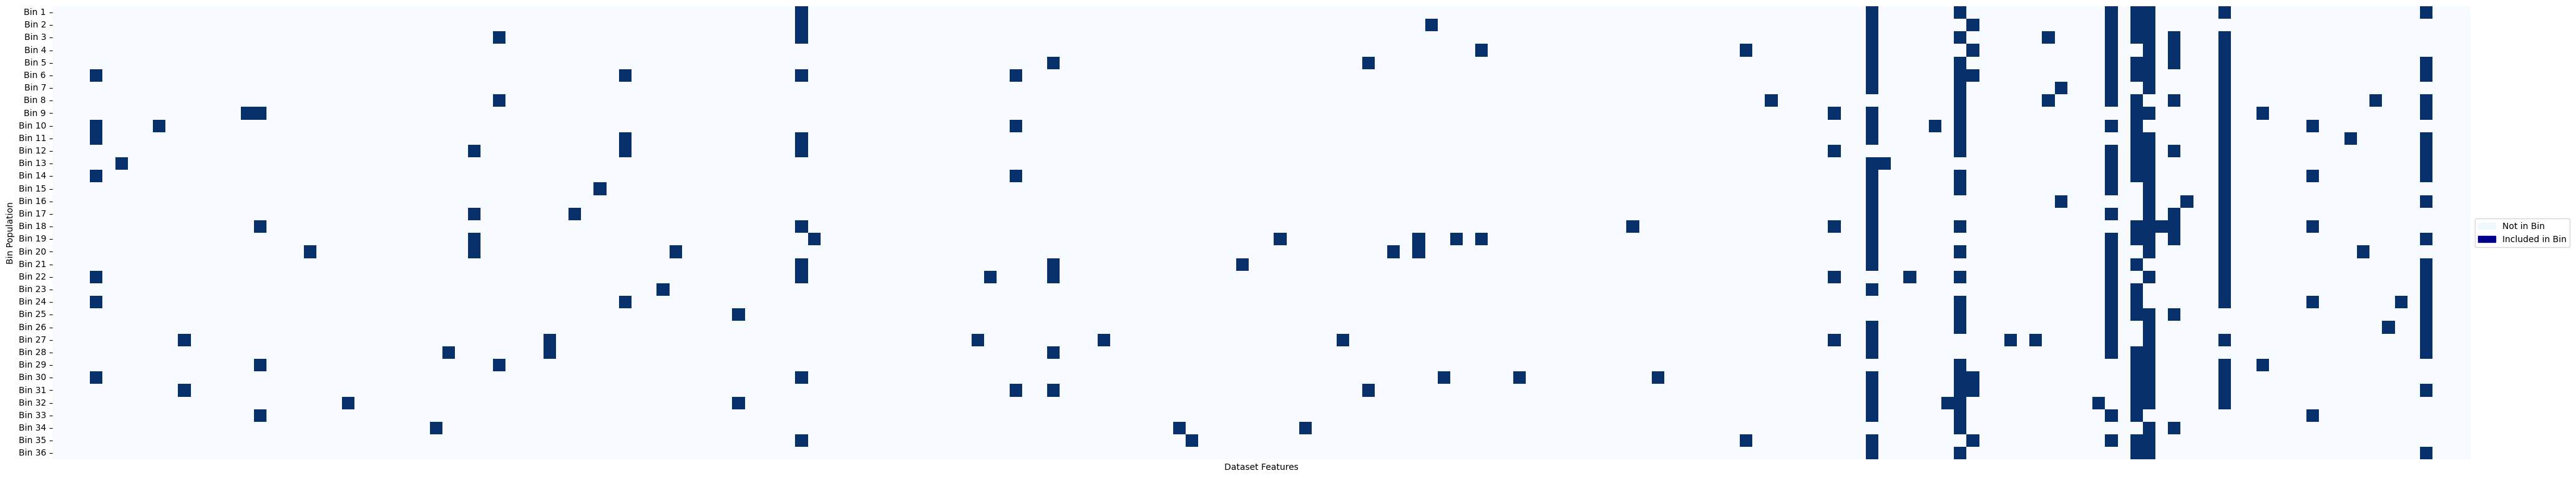

In [14]:
fibers.get_bin_population_heatmap_plot(save=True,output_folder=output_folder,data_name=data_name)

### Plot: Custom Bin Population Heatmap

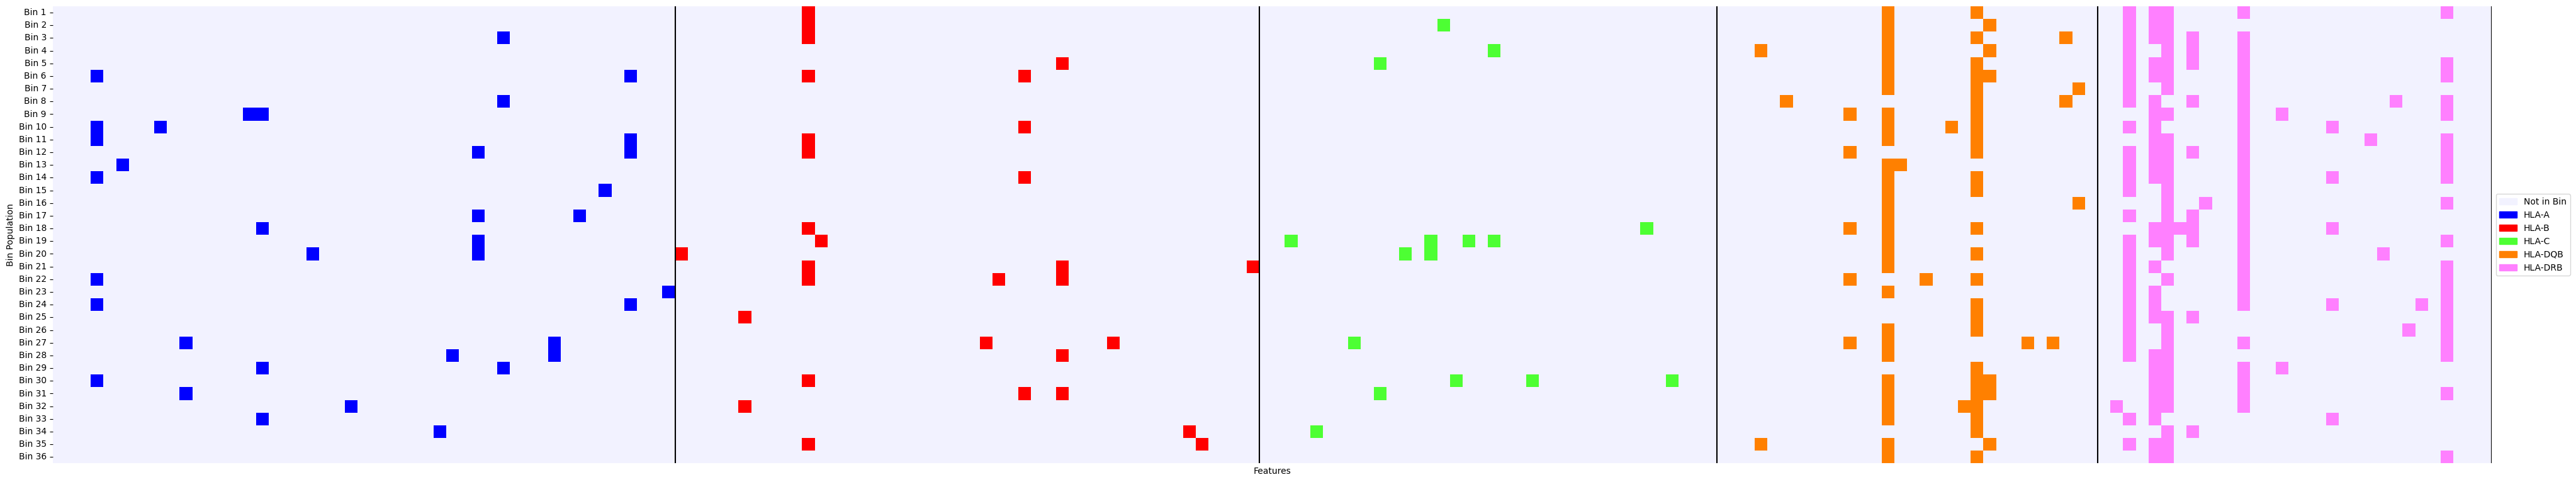

In [15]:
group_names=["A", "B", "C", "DQB", "DRB"]
legend_group_info = ['Not in Bin','HLA-A','HLA-B', 'HLA-C','HLA-DQB','HLA-DRB'] #2 default colors first followed by additional color descriptions in legend
color_features = [['B1', 'B10', 'B100', 'B101', 'B102', 'B103', 'B104', 'B105', 'B106', 'B107', 'B108', 'B109', 'B11', 'B110', 'B111', 'B112', 'B113', 'B114', 'B115', 'B116', 'B117', 'B118', 'B119', 'B12', 'B120', 'B121', 'B122', 'B123', 'B124', 'B125', 'B126', 'B127', 'B128', 'B129', 'B13', 'B130', 'B131', 'B132', 'B133', 'B134', 'B135', 'B136', 'B137', 'B138', 'B139', 'B14', 'B140', 'B141', 'B142', 'B143', 'B144', 'B145', 'B146', 'B147', 'B148', 'B149', 'B15', 'B150', 'B151', 'B152', 'B153', 'B154', 'B155', 'B156', 'B157', 'B158', 'B159', 'B16', 'B160', 'B161', 'B162', 'B163', 'B164', 'B165', 'B166', 'B167', 'B168', 'B169', 'B17', 'B170', 'B171', 'B172', 'B173', 'B174', 'B175', 'B176', 'B177', 'B178', 'B179', 'B18', 'B180', 'B181', 'B182', 'B183', 'B184', 'B185', 'B186', 'B187', 'B188', 'B189', 'B19', 'B190', 'B191', 'B192', 'B193', 'B194', 'B2', 'B20', 'B21', 'B22', 'B23', 'B24', 'B25', 'B26', 'B27', 'B28', 'B29', 'B3', 'B30', 'B31', 'B32', 'B33', 'B34', 'B35', 'B36', 'B37', 'B38', 'B39', 'B4', 'B40', 'B41', 'B42', 'B43', 'B44', 'B45', 'B46', 'B47', 'B48', 'B49', 'B5', 'B50', 'B51', 'B52', 'B53', 'B54', 'B55', 'B56', 'B57', 'B58', 'B59', 'B6', 'B60', 'B61', 'B62', 'B63', 'B64', 'B65', 'B66', 'B67', 'B68', 'B69', 'B7', 'B70', 'B71', 'B72', 'B73', 'B74', 'B75', 'B76', 'B77', 'B78', 'B79', 'B8', 'B80', 'B81', 'B82', 'B83', 'B84', 'B85', 'B86', 'B87', 'B88', 'B89', 'B9', 'B90', 'B91', 'B92', 'B93', 'B94', 'B95', 'B96', 'B97', 'B98', 'B99'],['C1', 'C10', 'C100', 'C101', 'C102', 'C103', 'C104', 'C105', 'C106', 'C107', 'C108', 'C109', 'C11', 'C110', 'C111', 'C112', 'C113', 'C114', 'C115', 'C116', 'C117', 'C118', 'C119', 'C12', 'C120', 'C121', 'C122', 'C123', 'C124', 'C125', 'C126', 'C127', 'C128', 'C129', 'C13', 'C130', 'C131', 'C132', 'C133', 'C134', 'C135', 'C136', 'C137', 'C138', 'C139', 'C14', 'C140', 'C141', 'C142', 'C143', 'C144', 'C145', 'C146', 'C147', 'C148', 'C149', 'C15', 'C150', 'C151', 'C152', 'C153', 'C154', 'C155', 'C156', 'C157', 'C158', 'C159', 'C16', 'C160', 'C161', 'C162', 'C163', 'C164', 'C165', 'C166', 'C167', 'C168', 'C169', 'C17', 'C170', 'C171', 'C172', 'C173', 'C174', 'C175', 'C176', 'C177', 'C178', 'C179', 'C18', 'C180', 'C181', 'C182', 'C183', 'C184', 'C185', 'C186', 'C187', 'C188', 'C189', 'C19', 'C190', 'C191', 'C192', 'C193', 'C194', 'C195', 'C196', 'C197', 'C198', 'C199', 'C2', 'C20', 'C200', 'C201', 'C202', 'C203', 'C204', 'C205', 'C21', 'C22', 'C23', 'C24', 'C25', 'C26', 'C27', 'C28', 'C29', 'C3', 'C30', 'C31', 'C32', 'C33', 'C34', 'C35', 'C36', 'C37', 'C38', 'C39', 'C4', 'C40', 'C41', 'C42', 'C43', 'C44', 'C45', 'C46', 'C47', 'C48', 'C49', 'C5', 'C50', 'C51', 'C52', 'C53', 'C54', 'C55', 'C56', 'C57', 'C58', 'C59', 'C6', 'C60', 'C61', 'C62', 'C63', 'C64', 'C65', 'C66', 'C67', 'C68', 'C69', 'C7', 'C70', 'C71', 'C72', 'C73', 'C74', 'C75', 'C76', 'C77', 'C78', 'C79', 'C8', 'C80', 'C81', 'C82', 'C83', 'C84', 'C85', 'C86', 'C87', 'C88', 'C89', 'C9', 'C90', 'C91', 'C92', 'C93', 'C94', 'C95', 'C96', 'C97', 'C98', 'C99'],['DQB11', 'DQB110', 'DQB111', 'DQB112', 'DQB113', 'DQB114', 'DQB115', 'DQB116', 'DQB117', 'DQB118', 'DQB119', 'DQB12', 'DQB120', 'DQB121', 'DQB122', 'DQB123', 'DQB124', 'DQB125', 'DQB126', 'DQB127', 'DQB128', 'DQB129', 'DQB13', 'DQB130', 'DQB131', 'DQB132', 'DQB133', 'DQB134', 'DQB135', 'DQB136', 'DQB137', 'DQB138', 'DQB139', 'DQB14', 'DQB140', 'DQB141', 'DQB142', 'DQB143', 'DQB144', 'DQB145', 'DQB146', 'DQB147', 'DQB148', 'DQB149', 'DQB15', 'DQB150', 'DQB151', 'DQB152', 'DQB153', 'DQB154', 'DQB155', 'DQB156', 'DQB157', 'DQB158', 'DQB159', 'DQB16', 'DQB160', 'DQB161', 'DQB162', 'DQB163', 'DQB164', 'DQB165', 'DQB166', 'DQB167', 'DQB168', 'DQB169', 'DQB17', 'DQB170', 'DQB171', 'DQB172', 'DQB173', 'DQB174', 'DQB175', 'DQB176', 'DQB177', 'DQB178', 'DQB179', 'DQB18', 'DQB180', 'DQB181', 'DQB182', 'DQB183', 'DQB184', 'DQB185', 'DQB186', 'DQB187', 'DQB188', 'DQB189', 'DQB19', 'DQB190', 'DQB191', 'DQB192', 'DQB193', 'DQB194'],[ 'DRB11', 'DRB110', 'DRB111', 'DRB112', 'DRB113', 'DRB114', 'DRB115', 'DRB116', 'DRB117', 'DRB118', 'DRB119', 'DRB12', 'DRB120', 'DRB121', 'DRB122', 'DRB123', 'DRB124', 'DRB125', 'DRB126', 'DRB127', 'DRB128', 'DRB129', 'DRB13', 'DRB130', 'DRB131', 'DRB132', 'DRB133', 'DRB134', 'DRB135', 'DRB136', 'DRB137', 'DRB138', 'DRB139', 'DRB14', 'DRB140', 'DRB141', 'DRB142', 'DRB143', 'DRB144', 'DRB145', 'DRB146', 'DRB147', 'DRB148', 'DRB149', 'DRB15', 'DRB150', 'DRB151', 'DRB152', 'DRB153', 'DRB154', 'DRB155', 'DRB156', 'DRB157', 'DRB158', 'DRB159', 'DRB16', 'DRB160', 'DRB161', 'DRB162', 'DRB163', 'DRB164', 'DRB165', 'DRB166', 'DRB167', 'DRB168', 'DRB169', 'DRB17', 'DRB170', 'DRB171', 'DRB172', 'DRB173', 'DRB174', 'DRB175', 'DRB176', 'DRB177', 'DRB178', 'DRB179', 'DRB18', 'DRB180', 'DRB181', 'DRB182', 'DRB183', 'DRB184', 'DRB185', 'DRB186', 'DRB187', 'DRB188', 'DRB189', 'DRB19', 'DRB190', 'DRB191', 'DRB192', 'DRB193', 'DRB194']]
colors = [(1, 0, 0),(0.3,1,0.2),(1, 0.5, 0),(1,0.5,1)] # blue,red,green,orange,pink ---Alternatively orange (1, 0.5, 0)
default_colors = [(.95, .95, 1),(0, 0, 1)] #very light blue and blue
max_bins = 100
max_features = 100

fibers.get_custom_bin_population_heatmap_plot(group_names,legend_group_info,color_features,colors,default_colors,max_bins,max_features,save=True,output_folder=output_folder,data_name=data_name)

### Plot: Bin Population Pareto Front
In plot, dot colors indicate the 'group strata prop' of the given bin, and dot size is relative to the 'group threshold of that bin'.

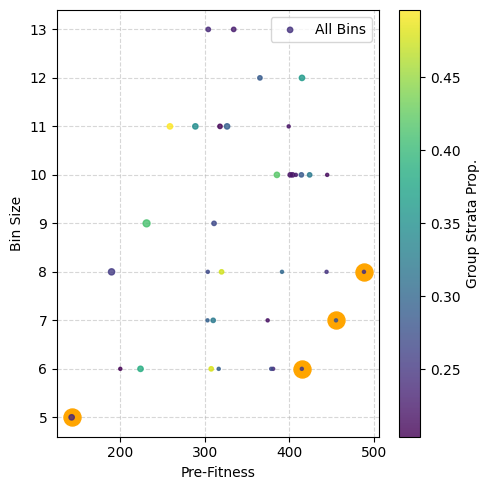

In [16]:
fibers.get_pareto_plot(save=True,output_folder=output_folder,data_name=data_name)

### Plot: Estimated Feature Tracking Scores
These scores accumulate throughout the training process, and do not nesessarily reflect feature importance of individual bins or the final bin population.

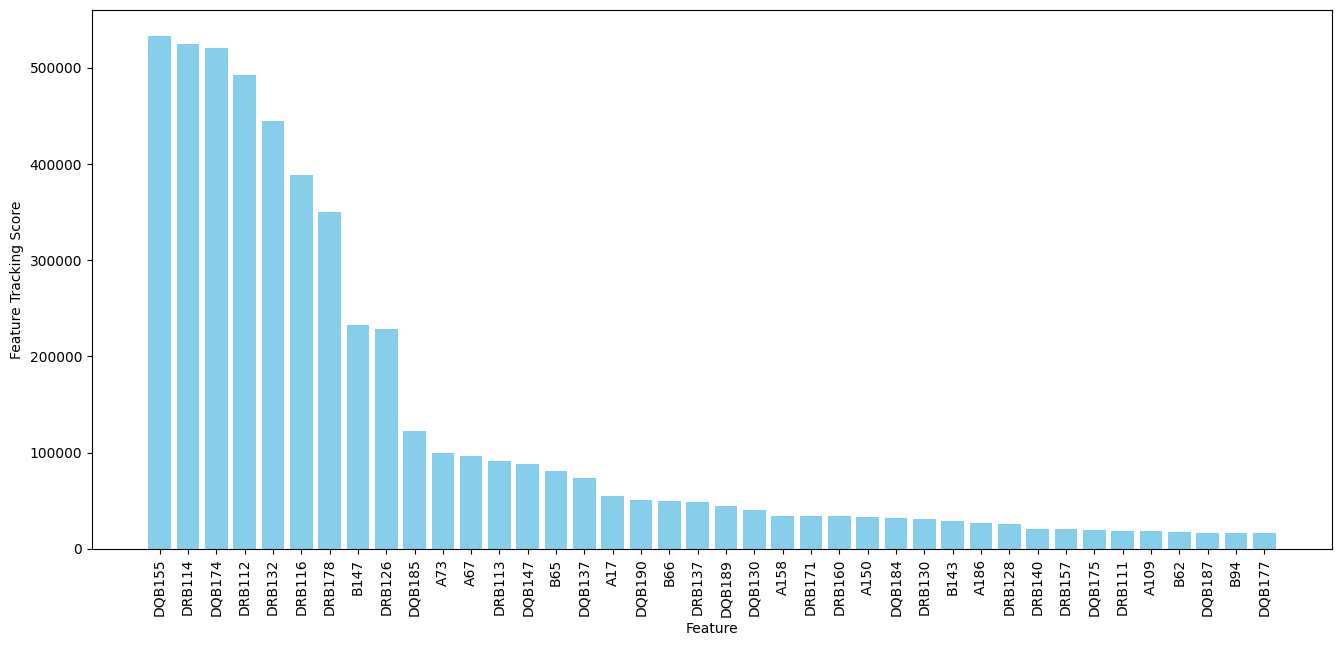

In [17]:
fibers.get_feature_tracking_plot(max_features=40,save=True,output_folder=output_folder,data_name=data_name)

### Plot: Dataset Covariate Residuals (if applicable)

In [18]:
if fibers.fitness_metric == 'residuals' or fibers.fitness_metric == 'log_rank_residuals':  
    fibers.get_residuals_histogram(save=True,output_folder=output_folder,data_name=data_name)

### Plot: Bin Log-Rank Scores Vs. Residuals Scores (if applicable)
In plot, dot colors indicate the 'group strata prop' of the given bin, and dot size is relative to the 'group threshold of that bin'.

In [19]:
if fibers.fitness_metric == 'log_rank_residuals':
    fibers.get_log_rank_residuals_plot(save=True,output_folder=output_folder,data_name=data_name)

###  Evaluate All Bins in Population using Cox PH Model (Can be slow)

In [20]:
fibers.calculate_cox_prop_hazards(data)

Dropped 0 invariant feature columns.


### Plot: Bin Log-Rank Scores Vs. Adjusted Hazard Ratios (if applicable)
In plot, dot colors indicate the 'group strata prop' of the given bin, and dot size is relative to the 'group threshold of that bin'.

In [ ]:
if fibers.fitness_metric == 'log_rank' or fibers.fitness_metric == 'log_rank_residuals':  
    fibers.get_log_rank_adj_HR_plot(save=True,output_folder=output_folder,data_name=data_name)

### Plot: Bin Adjusted Hazard Ratios Vs. Residuals Scores (if applicable)
In plot, dot colors indicate the 'group strata prop' of the given bin, and dot size is relative to the 'group threshold of that bin'.

In [ ]:
if fibers.fitness_metric == 'residuals' or fibers.fitness_metric == 'log_rank_residuals':   
    fibers.get_adj_HR_residuals_plot(save=True,output_folder=output_folder,data_name=data_name)

### Plot: Bin Adjusted Hazard Ratios Vs. Log Rank * Residuals Scores (if applicable)
In plot, dot colors indicate the 'group strata prop' of the given bin, and dot size is relative to the 'group threshold of that bin'.

In [ ]:
if fibers.fitness_metric == 'log_rank_residuals':   
    fibers.get_adj_HR_metric_product_plot(save=True,output_folder=output_folder,data_name=data_name)

***
## History of Bin Evolution (Top Bin Each Generation)
### Plot: Fitness of top bin across training iterations

In [ ]:
fibers.get_fitness_progress_plot()

### Plot: Scoring Metric and Pre-Fitness of top bin across training iterations

In [ ]:
fibers.get_perform_progress_plot(save=True,output_folder=output_folder,data_name=data_name)

### Plot: Normalized Top-Bin Stats Across Training Iterations

In [ ]:
fibers.get_misc_progress_plot(save=True,output_folder=output_folder,data_name=data_name)

### View Top Bin Information Across all Iterations/Generations

In [ ]:
fibers.perform_track_df

***
## Save Bin Population
### Save Bin Population Details to CSV

In [ ]:
pop_df = fibers.get_pop()
pop_df.to_csv(output_folder+'/'+'Pop_'+data_name+'.csv', index=False)

### Pickle Trained FIBERS Object (For Future Use)

In [ ]:
with open(output_folder+'/'+data_name+'.pickle', 'wb') as f:
    pickle.dump(fibers, f)

***
## Transforming Bins Into New Features (i.e. Feature Learning) and Save as New CSV Files
### Transform Bins Using Total Sums (i.e. Respective Bin Thresholds Not Applied)

In [ ]:
tdf = fibers.transform(data,full_sums=True)
tdf.to_csv(output_folder+'/'+'Transformed_FullSums_'+data_name+'.csv', index=False)
tdf

### Transform Bins Using Respective Bin Threshold (i.e. 0 = At/Under Threshold Group and 1 = Over Threshold Group)

In [ ]:
tdf = fibers.transform(data,full_sums=False)
tdf.to_csv(output_folder+'/'+'Transformed_Threshold'+data_name+'.csv', index=False)
tdf

***
## Open Pickled FIBERS Object (Example)

In [ ]:
with open(output_folder+'/'+data_name+'.pickle', 'rb') as f:
    fibers = pickle.load(f)

fibers.get_bin_report(bin_index)